**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [227]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

from scipy.stats import mode

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [229]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.k = n_neighbors
        self.algorithm = algorithm
        self.metric=metric
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.x_train = X
            self.y_train = y
            
            if self.metric == 'euclidean':
                self.distance = euclidean_distances
            elif self.metric == 'cosine':
                self.distance = cosine_distances
            
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X, metric=self.metric)
            self.y_train = y
    
    
    def predict(self, X):
        
        if self.algorithm == 'brute':
            
            dist = self.distance(X, self.x_train)
            index = np.argsort(dist, axis=1)[:,:self.k].astype(int)
            
        if self.algorithm == 'kd_tree':
            index = self.tree.query(X, self.k, return_distance=False)

        return mode(self.y_train[index], axis=1)[0].ravel()
        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [170]:
iris = datasets.load_iris()

In [171]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [172]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [173]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [174]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

(15, 4)
(135, 4)
[5.2 2.7 3.9 1.4]
[5.2 3.5 1.5 0.2]


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [175]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [176]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [177]:
%time clf.predict(X_test)

Wall time: 1.96 ms


array([1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0])

In [178]:
%time my_clf.predict(X_test)

(15, 4)
(135, 4)
[5.2 2.7 3.9 1.4]
[5.2 3.5 1.5 0.2]
Wall time: 2 ms


array([1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [179]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [180]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [181]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [182]:
%time my_clf.fit(X_train, y_train)

Wall time: 999 µs


In [183]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0])

In [184]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0])

In [185]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [186]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [187]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [264]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(stop_words='english', max_df=0.9)
X = vectorizer.fit_transform(data)

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(stop_words='english', max_df=0.9)
X1 = vectorizer1.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [302]:
from sklearn.model_selection import KFold

In [303]:
kf = KFold(n_splits=3, shuffle=True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [304]:
def best_k(X, y, metric):
    
    scores = []
    
    for k in range(1, 26):
        
        my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric=metric)
        res = []
        
        for train, test in kf.split(X):
            X_train, y_train = X[train], y[train]
            X_test, y_test = X[test], y[test]

            my_clf.fit(X_train, y_train)
            prediction = my_clf.predict(X_test)
            res.append(accuracy_score(prediction, y_test))
        
        scores.append(np.mean(res))
    
    return scores
            

In [305]:
def plot_scores(scores_count_euc, scores_tfidf_euc, scores_count_cos, scores_tfidf_cos):
    
    fig, ax = plt.subplots(1, 2)
    
    xt = np.arange(1, len(scores_count_euc) + 1)
    
    ax[0].plot(xt, scores_count_euc, label='count_vectorizer, euclidean')
    ax[0].plot(xt, scores_tfidf_euc, label='tf-idf_vectorizer, euclidean')
    ax[1].plot(xt, scores_count_cos, label='count_vectorizer, cosine')
    ax[1].plot(xt, scores_tfidf_cos, label='tf-idf_vectorizer, cosine')

    #ax.set_title('Влияние числа рассматриваемых соседей на точность алгоритма c заданными мерой способом векторизации')

    ax[0].set_xlabel('Число соседей')
    ax[0].set_ylabel('Средняя точность алгоритма на кросс-валидации')
    
    ax[1].set_xlabel('Число соседей')
    ax[1].set_ylabel('Средняя точность алгоритма на кросс-валидации')

    
    fig.set_figwidth(20)    
    fig.set_figheight(5) 
    
    ax[0].legend()
    ax[1].legend()

In [306]:
s1 = best_k(X, target, 'euclidean')

In [307]:
s2 = best_k(X1, target, 'euclidean')

In [308]:
s3 = best_k(X, target, 'cosine')

In [309]:
s4 = best_k(X1, target, 'cosine')

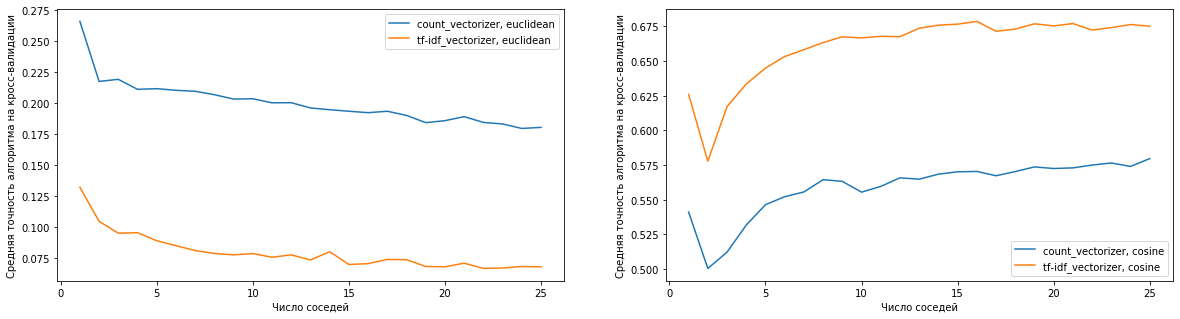

In [310]:
plot_scores(s1, s2, s3, s4)

Итог -- с текстами ожидаемо лучше работает косинусная метрика, для векторизации лучше применять tf-idf преобразование.

Лучший результат:

In [311]:
print('число соседей -', np.argmax(s4) + 1)
print('средняя точность -', np.max(s4))

число соседей - 16
средняя точность - 0.6786272354958339


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [312]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [313]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [317]:
X_test = vectorizer1.transform(data_test)
X_train = X1

In [316]:
my_clf = MyKNeighborsClassifier(n_neighbors=16, algorithm='brute', metric="cosine")

In [318]:
my_clf.fit(X_train, target)

In [319]:
prediction = my_clf.predict(X_test)

In [320]:
accuracy_score(target_test, prediction)

0.6198884758364313

Качество на тестовой выборке ниже, чем на валидационной. Причина в отличие структуры тестовой выборки от обучающей.